## Prioritization Model 

Editor: Huilin Lu

Date: Nov, 2019

### Goal of Priorization Model:
--- 1. Find the important interpretable variables that can predict the features that add most organization value.

--- 2. How those important variables combine(formula, feature selection) and scale(quantify categorical variables).

##### Note: In all the models I applied, I did not split train-test datasets, as the main goal is to organize the formula to calculate organizational value

### Build the Library Directory

In [114]:
from os import chdir, getcwd
getcwd()
## chdir('\\\\Wil-entsasprd06\\digitalanalytics\\D17911_Lu\\Prioritization Model')
chdir('C:\\Users\\D17911\\Downloads\\Applied Data Science with Python Specialization\\Applied Machine Learning in Python')

### Import Raw Data

In [170]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


roadmap = pd.read_csv('Road Map Data_P.csv', sep=',')
roadmap.head(5)
roadmap.dropna(how = 'all', inplace = True )
roadmap.tail(3)


,Feature,Release Label,User Type,User Impact,User Impact Score,Voice of the Client,VoC Score,App Store Feedback,App Store Feedback Score,Business Value(Total $ Revenue or Cost Savings ),...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,U Web Contact Information in Profile and Settings,0,Retail,250K-500K,5,NaN,NaN,NaN,NaN,$0-100K,...,Low,1,Javelin,2.0,12,NaN,S,2,20,6.0
123,Update Contact Information bi-annual Splash Page,0,Retail,Over 1MM,13,NaN,NaN,NaN,NaN,$0-100K,...,Med,3,NaN,NaN,25,NaN,L,5,200,5.0
124,Make Credit Card Rewards a Default Tile,0,Retail,500K-1MM,8,20-10,1.0,NaN,NaN,$0-100K,...,Low,1,NaN,NaN,14,NaN,L,5,200,2.8


### Data Manipulation
#### Deal with Missing Data

In [171]:
roadmap['VoC Score'].fillna(inplace = True, value = 0)
roadmap['App Store Feedback Score'].fillna(inplace = True, value = 0)
roadmap['Third-party Data Score'].fillna(inplace = True, value = 0)
roadmap['Work Effort Score'].fillna(inplace = True, value = 0)

roadmap.tail(3)

,Feature,Release Label,User Type,User Impact,User Impact Score,Voice of the Client,VoC Score,App Store Feedback,App Store Feedback Score,Business Value(Total $ Revenue or Cost Savings ),...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,U Web Contact Information in Profile and Settings,0,Retail,250K-500K,5,NaN,0.0,NaN,0.0,$0-100K,...,Low,1,Javelin,2.0,12,NaN,S,2,20,6.0
123,Update Contact Information bi-annual Splash Page,0,Retail,Over 1MM,13,NaN,0.0,NaN,0.0,$0-100K,...,Med,3,NaN,0.0,25,NaN,L,5,200,5.0
124,Make Credit Card Rewards a Default Tile,0,Retail,500K-1MM,8,20-10,1.0,NaN,0.0,$0-100K,...,Low,1,NaN,0.0,14,NaN,L,5,200,2.8


### Distribution of Manual Created Label (Classification Label)

#### 67 Not Released Features vs. 58 Released Features

In [3]:
roadmap['Release Label'].value_counts()

0    67
1    58
Name: Release Label, dtype: int64

#### Released Label Distribution

Nearly 50 vs 50 pct

<IPython.core.display.Javascript object>


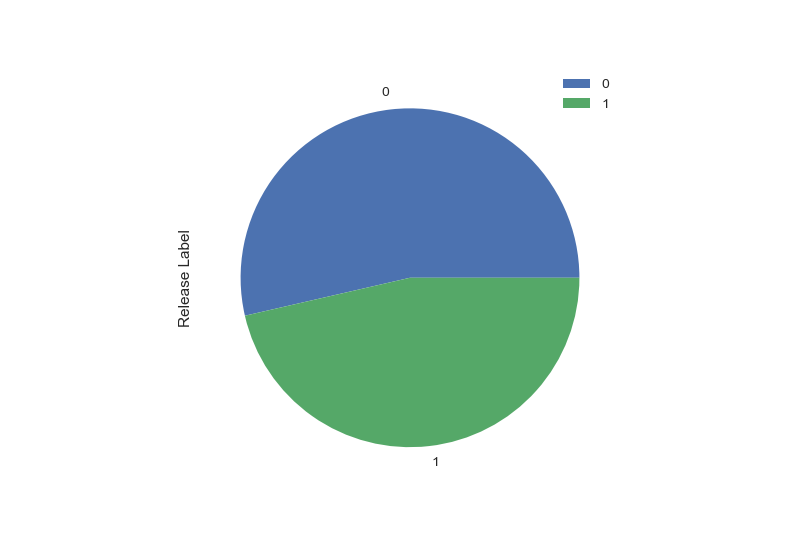

In [3]:
%matplotlib notebook
plt.figure()
roadmap['Release Label'].value_counts().plot(kind='pie', legend = True)

#### Boxplot of Original Priority Score vs Released Label

It indicates that for original priority score, released features have higher organization values comparing with not released features.

<IPython.core.display.Javascript object>


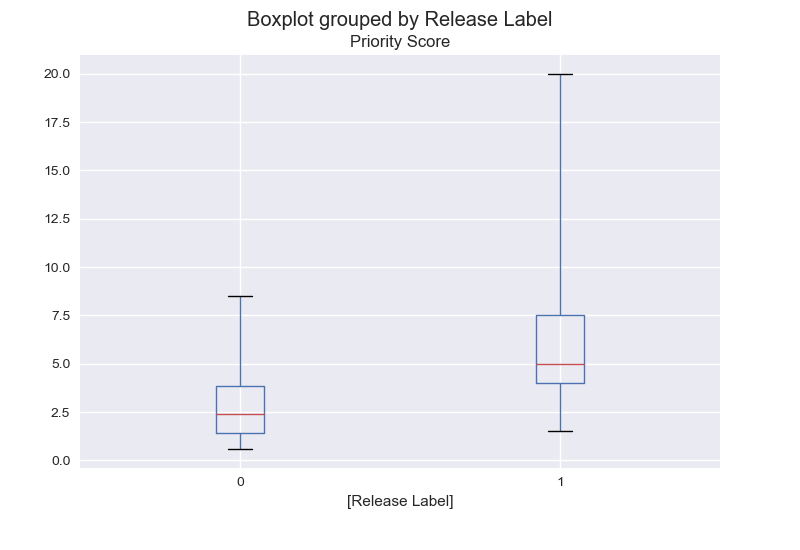

In [5]:
roadmap.boxplot(column=['Priority Score'], by = ['Release Label'], whis = 'range')
plt.show()

#### Boxplot of Work Effort Score vs. Release Label

It indicates that 75% of released features have a lower work effort score comparing to those not released features.

<IPython.core.display.Javascript object>


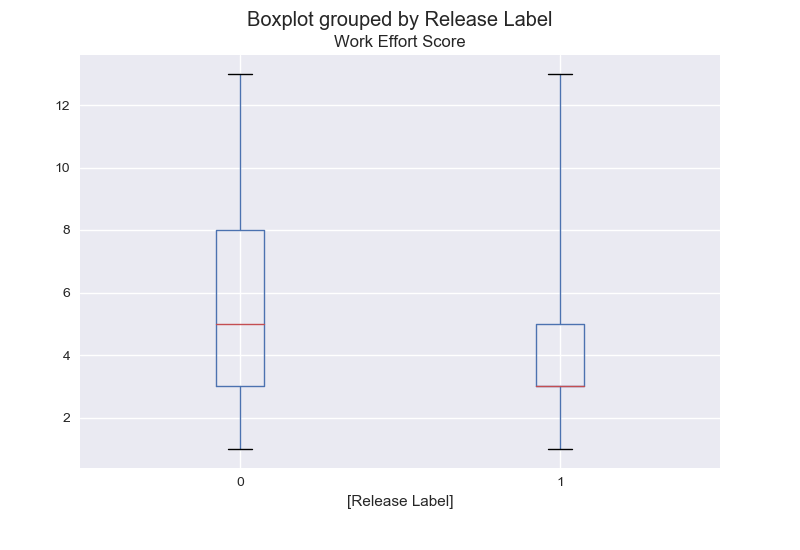

In [6]:
roadmap.boxplot(column=['Work Effort Score'], by = ['Release Label'], whis = 'range')
plt.show()

### Heatmap of All Data Inputs

The released features tend to have higher Time Criticality Score and high Risk Reduction Score.

The not released features tend to have higher Work Effort Score.

<IPython.core.display.Javascript object>


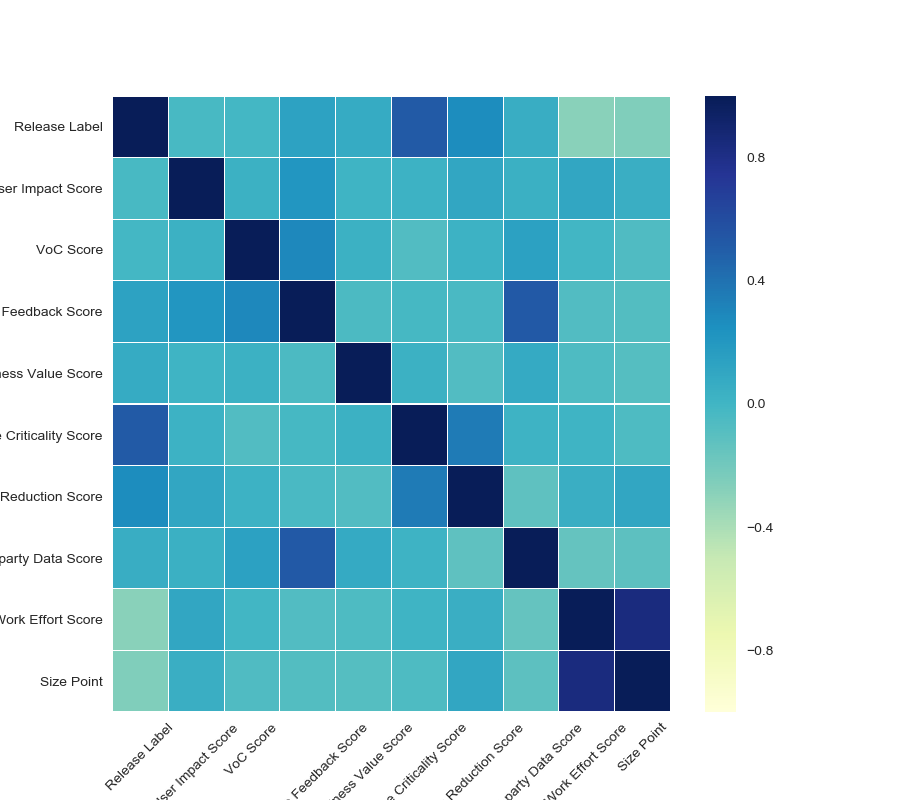

In [172]:
dataframe = roadmap[['Release Label', 'User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score',
                     'Size Point']]

dataframe.tail(3)
correlation_matrix = dataframe.corr()
f, ax = plt.subplots(figsize = (9, 8))
sn.heatmap(correlation_matrix, ax = ax, cmap = 'YlGnBu', linewidths = 0.1)
## locs, labels = plt.xticks()
## plt.setp(labels, rotation=0)
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.xticks(rotation=45)
plt.show()

#### Boxplot of Time Criticality Score vs. Release Label

75% of not released features have lower time criticality score than bottom 25% of the released features. This indicates that Time Criticality Score is a very import feature when to decide a feature will be released or not.

<IPython.core.display.Javascript object>


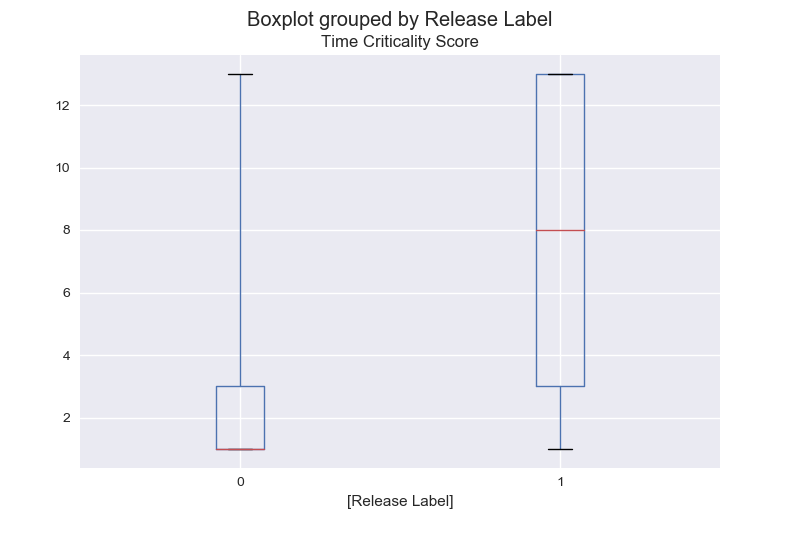

In [5]:
roadmap.boxplot(column=['Time Criticality Score'], by = ['Release Label'], whis = 'range')
plt.show()


### Set Up Data Input for Machine Learning Models

In [173]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]

#### We have 8 independent variables(dimensions) to make predictive analysis

In [10]:
x_train.head(3)

,User Impact Score,VoC Score,App Store Feedback Score,Business Value Score,Time Criticality Score,Risk Reduction Score,Third-party Data Score,Work Effort Score
0,2,0.0,0.0,1,8,13,0.0,13
1,5,0.0,0.0,1,13,8,0.0,3
2,5,0.0,0.0,1,1,1,0.0,2


#### Scatter Plot on two dimensions (Work Effort Score and Time Criticality Score)

Released Features data points are crowded on the bottom right, not released features data points are crowded on the top left.

<IPython.core.display.Javascript object>


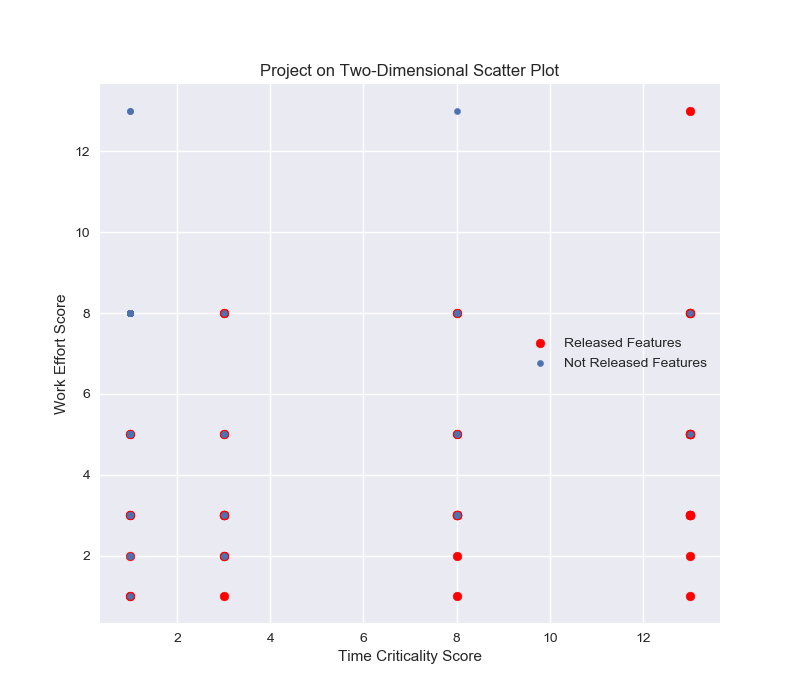

In [15]:
X = dataframe.iloc[:, :-1]
release = X[X['Release Label']==1]
not_release = X[X['Release Label']==0]
f, ax = plt.subplots(figsize = (8, 7))

plt.scatter(release['Time Criticality Score'], release['Work Effort Score'], s=40, label='Released Features', c='red')
plt.scatter(not_release['Time Criticality Score'], not_release['Work Effort Score'], s=20, label='Not Released Features')

plt.title('Project on Two-Dimensional Scatter Plot')
plt.xlabel('Time Criticality Score')
plt.ylabel('Work Effort Score')
plt.legend() 
plt.show();

### Scatter Plot in Three-Dimension

#### Imagine we can use a hyperplane to classify the released features and not released features

<IPython.core.display.Javascript object>


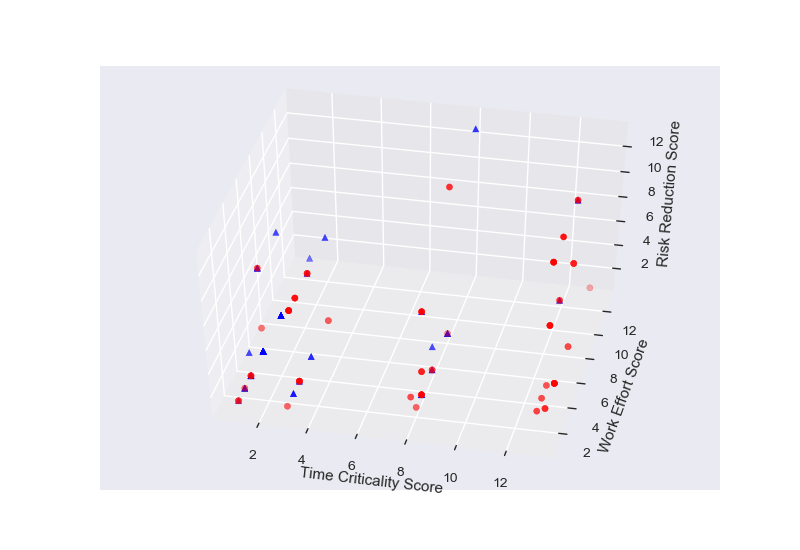

In [174]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(release['Time Criticality Score'],release['Work Effort Score'], release['Risk Reduction Score'], 
           c = 'r', marker = 'o' )
ax.scatter(not_release['Time Criticality Score'],not_release['Work Effort Score'], not_release['Risk Reduction Score'], 
           c = 'b', marker = '^' )

ax.set_xlabel('Time Criticality Score')
ax.set_ylabel('Work Effort Score')
ax.set_zlabel('Risk Reduction Score')

plt.show()


### Fit All the Data to Logistic Regression Model --  Full Model

#### Accuracy rate=0.81,  Confusion Matrix

---- Note: we do not need to have the train-test split datasets, as we only want to have the formula to calculate the organization value for future features.

In [133]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

clf = LogisticRegression().fit(x_train, y_train)
title = 'Logistic regression, Prioritization Model data C = {:.3f}'.format(1.0)
#plot_class_regions_for_classifier_subplot(clf, x_train.as_matrix(), 
 #                                         y_train.as_matrix(), None, None, title = title, subplot = subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_train)
matrix = confusion_matrix(y_train, y_pred)
# x_train = dataframe[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
#                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]
print(matrix)
print(clf.coef_)

Accuracy of Logistic regression classifier on training set: 0.81
[[58  9]
 [15 43]]
[[-0.02 -0.1   0.62  0.14  0.3   0.12 -0.1  -0.38]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Visualize the Logistic Regression Model Decision Boundary by using PCA(Principle Component Analysis) Approach.

<IPython.core.display.Javascript object>


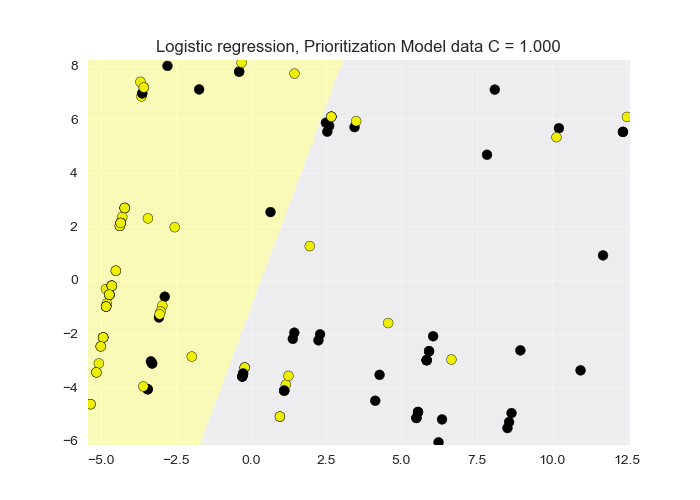

Accuracy of Logistic regression classifier on Principle Components: 0.75


In [47]:
## Use Principle Component to Visualize the Decision Boundary
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(x_train)

from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

clf = LogisticRegression().fit(pca, np.array(y_train).ravel())
title = 'Logistic regression, Prioritization Model data C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, pca, 
                                          np.array(y_train).ravel(), None, None, title = title, subplot = subaxes)

print('Accuracy of Logistic regression classifier on Principle Components: {:.2f}'.format(clf.score(pca, y_train)))



<IPython.core.display.Javascript object>


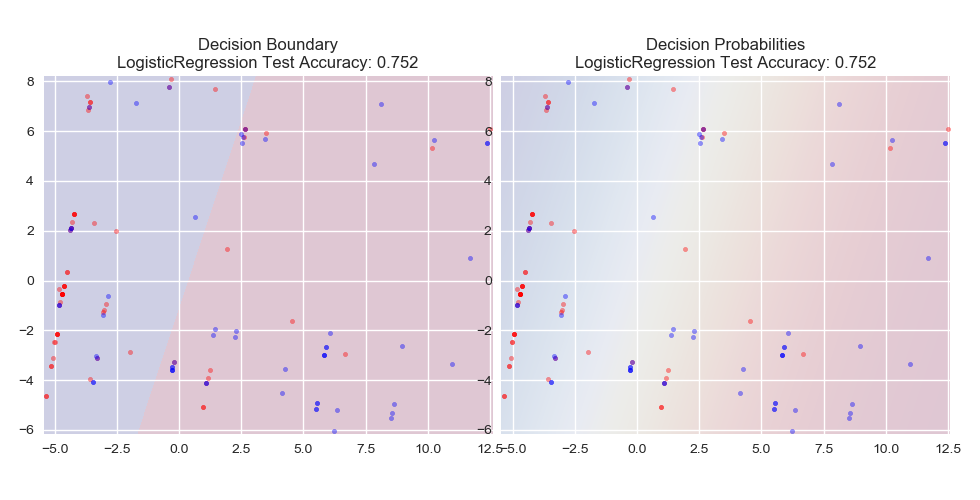

In [52]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y==0,0], X[y==0,1], alpha=0.4, label='Edible', s=10, c = 'r')
        plt.scatter(X[y==1,0], X[y==1,1], alpha=0.4, label='Posionous', s=10, c='b')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(pca,np.array(y_train).ravel())

plot_mushroom_boundary(pca, np.array(y_train).ravel(), model)

#### Logistic Regression Model Evaluation: ROC curve

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


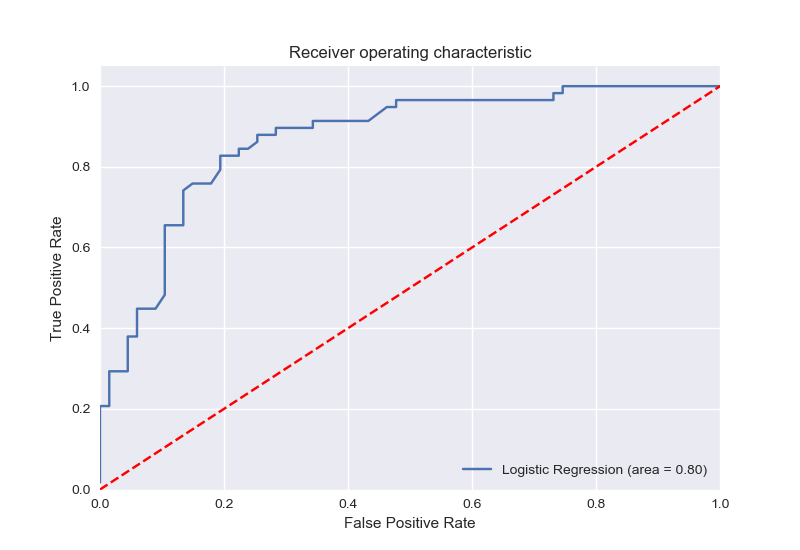

In [80]:
clf = LogisticRegression().fit(x_train, y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_train, clf.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Remove Insignificant and Sparse Dimensions( Not Rescale the User Impact Score Yet).

Get accuracy rate 0.78, coefficient estimates shown below

In [136]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]
clf = LogisticRegression().fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(clf.decision_function)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
# ['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
#  'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']

[[ 0.    0.03  0.11  0.3   0.12 -0.02 -0.39]]
[-0.31]
<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
Accuracy of Logistic regression classifier on training set: 0.79


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
lm = LogisticRegression()
lm.fit(x_train, y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x_train)

newX = pd.DataFrame({"Constant":np.ones(len(x_train))}).join(pd.DataFrame(x_train))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unable to coerce to Series, length must be 1: given 125

### Support Vector Machine Model with rbf Function gives a higher Accuracy Rate (0.9) but does not have estimated coefficients
#### Linear Support Vector Machine gives the same accuracy rate as Logistic Regression gives (0.8) on Full data

In [28]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier



clf = SVC(kernel='rbf').fit(x_train, y_train)
# title = 'Support Vector Machine, Prioritization Model data C = {:.3f}'.format(1.0)
#plot_class_regions_for_classifier_subplot(clf, x_train.as_matrix(), 
 #                                         y_train.as_matrix(), None, None, title = title, subplot = subaxes)

print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_train)
matrix = confusion_matrix(y_train, y_pred)
print(matrix)


Accuracy of Support Vector Machine classifier on training set: 0.90
[[65  2]
 [10 48]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score',  'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score',  'Work Effort Score']]
clf = LinearSVC().fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(clf.decision_function)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
# ['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
#  'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']

[[-0.    0.06  0.11  0.05 -0.14]]
[-0.21]
<bound method LinearClassifierMixin.decision_function of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)>
Accuracy of Logistic regression classifier on training set: 0.80


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest Model Classification
#### RF Model Accuracy reaches 94%, the results can only be expressed by probability instead of estimated coefficients.

In [53]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features = 3, random_state = 0)
clf.fit(x_train, y_train)

print('Prioritization Model')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print(clf.predict_proba(x_train)[:, 1])

Prioritization Model
Accuracy of RF classifier on training set: 0.94
[0.1  0.9  0.   0.9  0.2  0.7  0.   0.9  0.   0.   0.8  0.48 0.4  0.66
 0.   0.2  1.   1.   0.   0.   0.   0.28 1.   0.9  0.33 0.74 0.1  0.8
 0.   0.   0.12 0.28 0.9  0.   0.   0.2  0.2  0.   0.35 0.   0.   0.
 0.4  0.   0.18 0.1  0.1  0.9  0.   0.   0.   0.   0.9  0.8  0.35 0.97
 1.   0.35 0.97 1.   1.   0.2  1.   0.   0.   0.9  0.   0.5  0.   0.9
 0.   0.1  1.   0.   0.8  0.9  0.9  0.9  1.   0.9  1.   0.64 0.   0.
 0.   0.9  0.33 0.   0.8  0.1  0.64 0.   0.   0.2  0.6  0.9  0.9  0.2
 0.7  0.8  0.4  0.   0.   0.   1.   0.9  0.   0.   0.7  0.6  0.2  0.8
 1.   0.9  0.9  0.9  0.66 0.66 1.   1.   0.74 0.64 0.1  0.2  0.1 ]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<IPython.core.display.Javascript object>


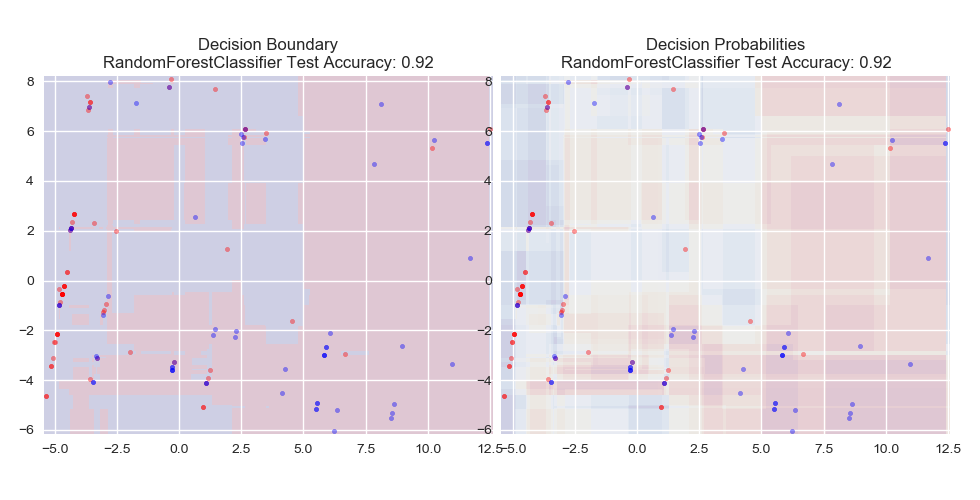

In [59]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y==0,0], X[y==0,1], alpha=0.4, label='Edible', s=10, c = 'r')
        plt.scatter(X[y==1,0], X[y==1,1], alpha=0.4, label='Posionous', s=10, c='b')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(pca,np.array(y_train).ravel())

plot_mushroom_boundary(pca, np.array(y_train).ravel(), model)
plt.show()

### Re-Quantify the User Impact Categorical Variable and Remove Sparse Dimensions

<IPython.core.display.Javascript object>


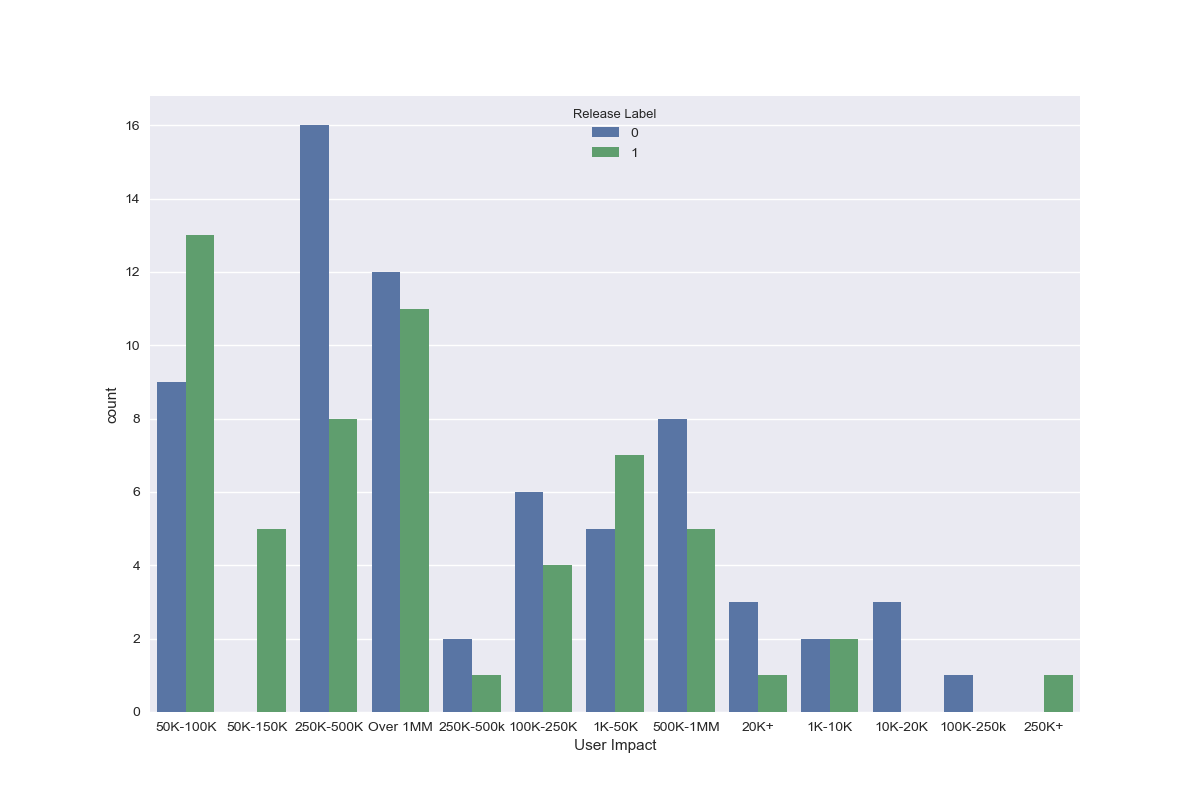

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


In [78]:
x1_release = roadmap.loc[roadmap['Release Label'] == 1, ['User Impact']]
x2_notrelease = roadmap.loc[roadmap['Release Label'] == 0, ['User Impact']]
fig, axes = plt.subplots(1, 1, figsize = (12, 8), sharey = True, dpi = 100)
import seaborn as sns

sns.countplot(x = 'User Impact', hue = 'Release Label', data = roadmap)


### Import Rescaling Data -- RoadMap Data_R

In [165]:

np.set_printoptions(precision=2)


roadmap_r = pd.read_csv('Road Map Data_R2.csv', sep=',')
roadmap_r.head(5)
roadmap_r.dropna(how = 'all', inplace = True )
roadmap_r.tail(3)

,Feature,Release Label,User Type,User Type Score,User Impact,User Impact Score,User Score,Voice of the Client,VoC Score,App Store Feedback,...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,SBO in U - Ph. 2 - ACH/Wire Alerts,1,Small_Business,5,1K-50K,3,6,NaN,NaN,NaN,...,Med,3,NaN,NaN,20,NaN,XS,1,12,20.0
123,Enhance Frictionless Link to BOAO per new SSO ...,1,Small_Business,5,1K-50K,3,6,NaN,NaN,NaN,...,High,8,NaN,NaN,19,NaN,M,3,80,6.3
124,Zelle Request Money advertisement in U,1,Retail,2,250K-500K,5,6,NaN,NaN,NaN,...,Low,1,NaN,NaN,10,NaN,XS,1,24,10.0


In [166]:
roadmap_r['VoC Score'].fillna(inplace = True, value = 0)
roadmap_r['App Store Feedback Score'].fillna(inplace = True, value = 0)
roadmap_r['Third-party Data Score'].fillna(inplace = True, value = 0)
roadmap_r['Work Effort Score'].fillna(inplace = True, value = 0)

roadmap_r.tail(3)

,Feature,Release Label,User Type,User Type Score,User Impact,User Impact Score,User Score,Voice of the Client,VoC Score,App Store Feedback,...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,SBO in U - Ph. 2 - ACH/Wire Alerts,1,Small_Business,5,1K-50K,3,6,NaN,0.0,NaN,...,Med,3,NaN,0.0,20,NaN,XS,1,12,20.0
123,Enhance Frictionless Link to BOAO per new SSO ...,1,Small_Business,5,1K-50K,3,6,NaN,0.0,NaN,...,High,8,NaN,0.0,19,NaN,M,3,80,6.3
124,Zelle Request Money advertisement in U,1,Retail,2,250K-500K,5,6,NaN,0.0,NaN,...,Low,1,NaN,0.0,10,NaN,XS,1,24,10.0


<IPython.core.display.Javascript object>


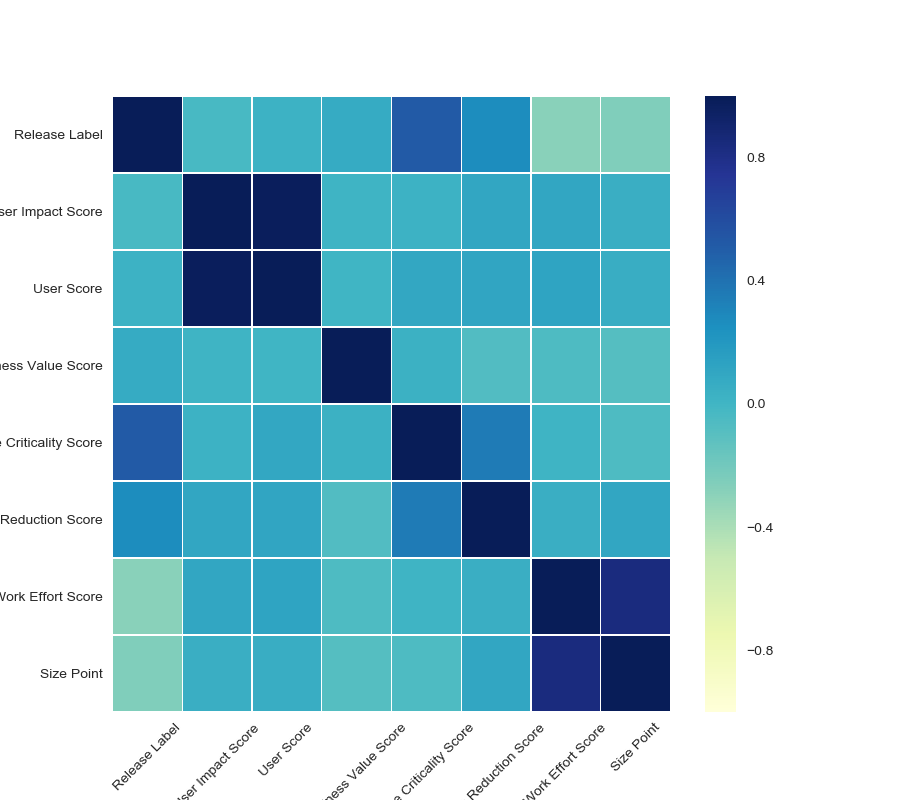

In [167]:
dataframe = roadmap_r[['Release Label', 'User Impact Score', 'User Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score',  'Work Effort Score',
                     'Size Point']]

dataframe.tail(3)
correlation_matrix = dataframe.corr()
f, ax = plt.subplots(figsize = (9, 8))
sn.heatmap(correlation_matrix, ax = ax, cmap = 'YlGnBu', linewidths = 0.1)
## locs, labels = plt.xticks()
## plt.setp(labels, rotation=0)
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.xticks(rotation=45)
plt.show()

In [163]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Score',  'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Work Effort Score']]

### Fit in Logistic Regression with Rescaled Data

---- It reaches accuracy rate of 83%

In [169]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

clf = LogisticRegression().fit(x_train, y_train)
title = 'Logistic regression, Prioritization Model data C = {:.3f}'.format(1.0)
#plot_class_regions_for_classifier_subplot(clf, x_train.as_matrix(), 
 #                                         y_train.as_matrix(), None, None, title = title, subplot = subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_train)
matrix = confusion_matrix(y_train, y_pred)
print(matrix)
print(clf.coef_)

Accuracy of Logistic regression classifier on training set: 0.79
[[57 10]
 [16 42]]
[[ 0.02  0.12  0.29  0.12 -0.4 ]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Apply Random Forest Classifier to Rescaled Data

---- Reaches accuracy rate of 96%

In [122]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Work Effort Score']]
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features = 3, random_state = 0)
clf.fit(x_train, y_train)

print('Prioritization Model')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print(clf.predict_proba(x_train)[:, 1])

Prioritization Model
Accuracy of RF classifier on training set: 0.96
[0.   0.   0.   0.   0.   0.   0.67 0.   0.   0.   0.   0.   0.   0.
 0.   0.05 0.33 0.   0.05 0.1  0.   0.   0.   0.   0.5  0.   0.   0.
 0.   0.   0.1  0.2  0.1  0.67 0.67 0.2  0.8  0.3  0.2  0.   0.3  0.1
 0.4  0.   0.3  0.2  0.5  0.7  0.3  0.4  0.   0.   0.   0.   0.45 0.6
 1.   0.   0.   0.05 0.   0.6  0.7  0.93 0.   0.8  0.9  0.8  1.   0.
 0.9  0.2  0.   0.9  0.9  0.2  1.   0.3  0.9  0.9  0.9  0.64 0.64 0.33
 0.7  0.33 1.   0.2  0.2  1.   0.9  0.8  0.9  0.4  0.7  0.3  1.   1.
 1.   0.9  1.   1.   1.   1.   1.   0.93 0.7  0.05 0.95 0.95 0.9  1.
 0.05 1.   0.9  1.   0.7  1.   1.   1.   1.   0.9  1.   0.9  1.  ]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#### Plot Decision Boundary and Decision Probabilities in Two Components (PCA)

<IPython.core.display.Javascript object>


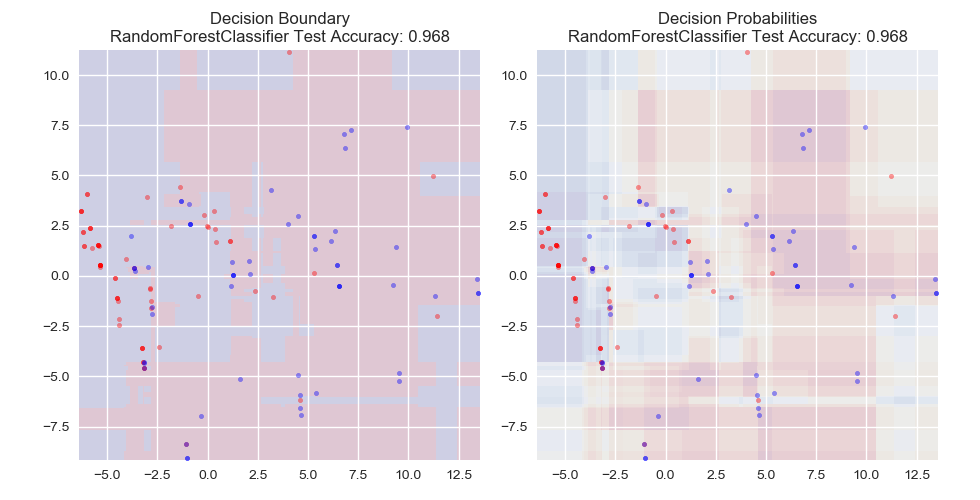

In [123]:
pca = PCA(n_components=2).fit_transform(x_train)
model = RandomForestClassifier()
model.fit(pca,np.array(y_train).ravel())

plot_mushroom_boundary(pca, np.array(y_train).ravel(), model)
plt.show()

### Apply Linear Regression Model

In [145]:
dataframe_linear = roadmap[['Priority Score', 'User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]
y_train = dataframe_linear[['Priority Score']]
x_train = dataframe_linear[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]

In [154]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(x_train, np.array(y_train))
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print(linreg.intercept_)
print(linreg.score(x_train, y_train))

linear model coeff (w): [[ 0.18  0.03  0.48  0.11  0.25  0.2   0.92 -0.79]]
[5.]
0.7031904847981778
